In [2]:
# from keras.preprocessing.text import Tokenizer # Removed
# from keras.preprocessing.sequence import pad_sequences # Removed

# Use the updated import paths from tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# The rest of your imports remain the same
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import nest_asyncio
nest_asyncio.apply()

!pip install nltk
import nltk
nltk.download('punkt')
!pip install swifter

import nltk
nltk.download('stopwords')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install demoji
import demoji

!pip install Sastrawi
!pip install wordcloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

!pip install scikeras
!pip install mlxtend
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=c22e4b2b330af732528533c715dd33368fc580de28aa39a4c06faf749ff880c9
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


## 👾 Load Data

In [ ]:
!pip install -U gdown
import gdown
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Analisis Sentimen/data/data urut/program_mbg.csv'
df = pd.read_csv(file_path)
# Now you can work with your dataframe df
df = df[['user_id_str', 'username', 'created_at', 'full_text', 'reply_count', 'retweet_count', 'favorite_count']]
df.rename(columns={'full_text': 'tweet'}, inplace=True)
df.duplicated('tweet').sum()

np.int64(14)

In [ ]:
df.drop_duplicates(subset='tweet', inplace=True)
df.duplicated('tweet').sum()

np.int64(0)

## ✏️ Preprocess Data

In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Pastikan NLTK resources telah diunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Cleaning

In [ ]:
df['tweet'][0]

'@hexagrap_id Dengan adanya Program MBG dari Presiden Prabowo masyarakat Bombana semakin optimis sama kesehatan anak-anaknya'

In [ ]:
def cleaningText(text):
    text = re.sub(r'@\w+', '', text)  # hapus mention
    text = re.sub(r'#\w+', '', text)  # hapus hashtag
    text = re.sub(r'RT\s+', '', text)  # hapus RT
    text = re.sub(r"http\S+", '', text)  # hapus link
    text = re.sub(r'[0-9]+', '', text)  # hapus angka
    text = re.sub(r'[²³¹º]', '', text)  # hapus karakter pangkat/superscript tertentu
    text = text.replace('\n', ' ')  # ganti newline dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = re.sub(r'\s+', ' ', text)  # hapus spasi berlebih
    text = text.strip()  # hapus spasi di awal/akhir
    return text

In [ ]:
df['tweet_clean'] = df['tweet'].apply(cleaningText)

In [ ]:
df['tweet_clean'][1508]

'Kepala BGN benar BAJINGAN Pejabat bisanya ngomong seperti itu Pengen liat kalau kejadian ma anak cucunya Tapi ga bakal sih Modelan manusia begini trus yang mengagungkan program MBG Mana mau keluarganya disekolah makan MBG'

### Case Folding

In [ ]:
# ------- Case Folding -------
# Use the Series.str.lower() function in Pandas
df['case_folding'] = df['tweet_clean'].str.lower()

df.loc[0:1, ['tweet_clean', 'case_folding']]

NameError: name 'df' is not defined

### Tokenization

In [ ]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# ------- Tokenizing --------
# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tokenize'] = df['case_folding'].apply(word_tokenize_wrapper)

# Fix: use the correct slice method
df.iloc[0:1000][['case_folding', 'tokenize']]  # You want to display rows from index 0 to 1607 (total 1608 rows)

,case_folding,tokenize
0,dengan adanya program mbg dari presiden prabow...,"[dengan, adanya, program, mbg, dari, presiden,..."
1,pendiri csis ekonomi stabil program mbg berpot...,"[pendiri, csis, ekonomi, stabil, program, mbg,..."
2,reassurance buat ngasih gizi yang baik buat an...,"[reassurance, buat, ngasih, gizi, yang, baik, ..."
3,tangerang selatan makin peduli sama makanan se...,"[tangerang, selatan, makin, peduli, sama, maka..."
4,keren program mbg dari presiden prabowo solusi...,"[keren, program, mbg, dari, presiden, prabowo,..."
...,...,...
1007,mari bersama mendukung program makan bergizi g...,"[mari, bersama, mendukung, program, makan, ber..."
1008,program mbg dapat membantu meningkatkan kemamp...,"[program, mbg, dapat, membantu, meningkatkan, ..."
1009,mari bersama mendukung program makan bergizi g...,"[mari, bersama, mendukung, program, makan, ber..."
1010,presiden pasti handle program mbg tetep handli...,"[presiden, pasti, handle, program, mbg, tetep,..."


### Normalization

In [ ]:
import pandas as pd

# Baca kamus normalisasi, asumsikan file csv tanpa header dan 2 kolom: kata tidak baku dan kata baku
normalizad_word = pd.read_csv('/content/kamusku.csv', header=None)
normalizad_word_dict = dict(zip(normalizad_word[0], normalizad_word[1]))

def normalized_term(document):
    # Jika document berupa list token, lakukan normalisasi
    if isinstance(document, list):
        return [normalizad_word_dict.get(term, term) for term in document]
    # Jika document berupa string, split dulu baru normalisasi
    elif isinstance(document, str):
        tokens = document.split()
        normalized_tokens = [normalizad_word_dict.get(term, term) for term in tokens]
        return normalized_tokens
    else:
        # Kalau tipe lain, kembalikan apa adanya
        return document

# Terapkan normalisasi pada df['tokenize']
df['normalisasi'] = df['tokenize'].apply(normalized_term)

In [ ]:
import pandas as pd
import string
import ast

# Baca kamus, asumsikan kolom: _id, singkat, hasil
kamus = pd.read_csv('/content/kamusku.csv')

# Buat dictionary key: singkat, value: hasil
normalizad_word_dict = dict(zip(kamus['singkat'], kamus['hasil']))

# Pastikan tokenize berupa list token, bukan string literal
if isinstance(df['tokenize'].iloc[0], str):
    df['tokenize'] = df['tokenize'].apply(lambda x: ast.literal_eval(x))

def normalized_term(document):
    normalized = []
    for term in document:
        # lower case dan strip tanda baca
        clean_term = term.lower().strip(string.punctuation + " ")
        # mapping normalisasi
        if clean_term in normalizad_word_dict:
            normalized.append(normalizad_word_dict[clean_term])
        else:
            normalized.append(term)  # pakai kata asli jika tidak ada di kamus
    return normalized

df['normalisasi'] = df['tokenize'].apply(normalized_term)

In [ ]:
df.iloc[5][['tokenize', 'normalisasi']]

,5
tokenize,"[program, mbg, keren, banget, terima, kasih, p..."
normalisasi,"[program, mbg, keren, banget, terima, kasih, p..."


In [ ]:
df['tokenize'][1508]

['kepala',
 'bgn',
 'benar',
 'bajingan',
 'pejabat',
 'bisanya',
 'ngomong',
 'seperti',
 'itu',
 'pengen',
 'liat',
 'kalau',
 'kejadian',
 'ma',
 'anak',
 'cucunya',
 'tapi',
 'ga',
 'bakal',
 'sih',
 'modelan',
 'manusia',
 'begini',
 'trus',
 'yang',
 'mengagungkan',
 'program',
 'mbg',
 'mana',
 'mau',
 'keluarganya',
 'disekolah',
 'makan',
 'mbg']

In [ ]:
df['normalisasi'][1508]

['kepala',
 'bgn',
 'benar',
 'bajingan',
 'pejabat',
 'bisanya',
 'ngomong',
 'seperti',
 'itu',
 'ingin',
 'lihat',
 'kalau',
 'kejadian',
 'sama',
 'anak',
 'cucunya',
 'tapi',
 'enggak',
 'bakal',
 'sih',
 'modelan',
 'manusia',
 'begini',
 'terus',
 'yang',
 'mengagungkan',
 'program',
 'mbg',
 'mana',
 'mau',
 'keluarganya',
 'disekolah',
 'makan',
 'mbg']

### Stopword Removal

In [ ]:
from nltk.corpus import stopwords

# 1. Ambil stopword NLTK
stopword_nltk = stopwords.words('indonesian')

# 2. Stopword manual tambahan
stopword_manual = [
    'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'boleh', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'kak',
    'sekali', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'saja', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
    'begitu', 'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nggak', 'rt', 'nyg', 'hehe', 'pen', 'u', 'nan', 'mbak'
    'loh', '&amp', 'yah', 'gw', 'lu', 'lo', 'gtw', 'bukan', 'iyaa', 'si', 'ruarr', 'itu', 'gue', 'id', 'netty', 'prasetiyani', 'aher',
    'dan', 'juga', 'cm', 'cmn', 'emg', 'mau', 'kali', 'jadi', 'begini', 'bila', 'nanti', 'praske', 'ri', 'ix', 'sy'
]

# 3. Gabungkan dan buat set
stopwords_gabungan = set(stopword_nltk + stopword_manual)

# 4. Fungsi hapus stopword dari list kata
def hapus_stopword(list_kata):
    return [kata for kata in list_kata if kata not in stopwords_gabungan]

# 5. Terapkan ke dataframe
df['stopword'] = df['normalisasi'].apply(hapus_stopword)

In [ ]:
df['stopword'][485]

['berproses',
 'program',
 'mbg',
 'berjalan',
 'merata',
 'lanjutkan',
 'mbg',
 'merata',
 'indonesia']

### Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemmed wrapper function
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Create a dictionary for unique terms
term_dict = {}
# Corrected: Iterate over the 'stopword' column (singular)
for document in df['stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Apply stemming to unique terms
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

# Apply stemmed term to the DataFrame
def get_stemmed_term(document):
    # Corrected: Ensure we are looking up terms that exist in term_dict
    # This handles cases where a word might have been removed in stopword removal but was in the original 'stopword' list used for term_dict
    return [term_dict[term] for term in document if term in term_dict]

df['stemming'] = df['stopword'].apply(get_stemmed_term)

In [ ]:
df.iloc[484][['tokenize', 'normalisasi', 'stopword', 'stemming']]

,485
tokenize,"[berproses, kak, program, mbg, baru, berjalan,..."
normalisasi,"[berproses, kak, program, mbg, baru, berjalan,..."
stopword,"[berproses, program, mbg, berjalan, merata, la..."
stemming,"[proses, program, mbg, jalan, rata, lanjut, mb..."


In [ ]:
import csv

# Membaca file TSV
with open('/content/lexicon_positif.tsv', 'r', newline='', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')  # Membaca file dengan pemisah tab
    next(reader, None)  # Lewati header jika ada
    for row in reader:
        print(row)  # Menampilkan setiap baris dalam file

['hai,3,1']
['merekam,2,1']
['ekstensif,3,1']
['paripurna,1,1']
['detail,2,1']
['pernik,3,1']
['belas,2,1']
['welas,4,1']
['kabung,1,1']
['rahayu,4,1']
['maaf,2,1']
['hello,2,1']
['promo,3,1']
['terimakasih,5,1']
['cover,3,1']
['mohon,2,1']
['mengawal,2,1']
['statistik,1,1']
['keluangan,3,1']
['jalan terbuka,3,2']
['banyaknya,3,1']
['lebar,3,1']
['bentang,1,1']
['hendaknya,1,1']
['silahkan,3,1']
['semboyan,2,1']
['ditunggu,2,1']
['akses,2,1']
['penerangan,2,1']
['hi,1,1']
['dibantu,2,1']
['makasih,4,1']
['halo,1,1']
['thanks,3,1']
['pengembangan,3,1']
['diva,2,1']
['punya,3,1']
['tidak segan,2,2']
['detailnya,1,1']
['tak segan,2,2']
['aktivasi,2,1']
['asih,3,1']
['kasih sayang,5,2']
['kekaguman,4,1']
['kehangatan,4,1']
['afeksi,2,1']
['renjana,2,1']
['amor,2,1']
['cinta kasih,5,2']
['tresna,2,1']
['filantropi,2,1']
['cintrong,2,1']
['dinamika,3,1']
['tuhan,3,1']
['merespon,3,1']
['makmur,4,1']
['suka cita,4,2']
['pengguna,1,1']
['tunggu,1,1']
['lotre,2,1']
['nggak,1,1']
['kupon,3,1']
[

## Lexicon_kamus

In [ ]:
import csv
# Membaca dan menyimpan lexicon positif dari file TSV
lexicon_positif_dict = {}
with open('/content/lexicon_positif.tsv', 'r', newline='', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter=',')
    next(reader, None)  # Lewati header
    for row in reader:
        if row[0] not in lexicon_positif_dict:
            lexicon_positif_dict[row[0]] = int(row[1])

# Membaca dan menyimpan lexicon negatif dari file TSV
lexicon_negatif_dict = {}
with open('/content/lexicon_negatif.tsv', 'r', newline='', encoding='utf-8') as tsvfile:
    reader = csv.reader(tsvfile, delimiter=',')
    next(reader, None)  # Lewati header
    for row in reader:
        if row[0] not in lexicon_negatif_dict:
            lexicon_negatif_dict[row[0]] = int(row[1])

## Analisis Sentiment

In [ ]:
# Fungsi analisis sentimen menggunakan lexicon Bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positif_dict:
            score += lexicon_positif_dict[word]
        if word in lexicon_negatif_dict:
            score += lexicon_negatif_dict[word]
    sentimen = 'Positif' if score >= 0 else 'Negatif'
    return score, sentimen

# Melakukan analisis sentimen pada kolom Tokenized
results = df['tokenize'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['Polarity Score'] = results[0]
df['polarity'] = results[1]

In [ ]:
from google.colab import files
df.to_csv('data_minggu_akhir.csv', index=False)
files.download('data_minggu_akhir.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### load ulang data after pre proces

In [3]:
df = pd.read_csv('/content/data_final (1).csv')

In [ ]:
df = pd.read_csv('/content/data_minggu_akhir.csv')

In [ ]:
df.duplicated('tweet').sum()

np.int64(0)

In [ ]:
df

,user_id_str,username,created_at,tweet,reply_count,retweet_count,favorite_count,tweet_clean,case_folding,tokenize,normalisasi,stopword,stemming,Polarity Score,polarity
0,1.687313e+18,adelia_mar9,Wed Apr 30 15:02:47 +0000 2025,@hexagrap_id Dengan adanya Program MBG dari Pr...,0,0,0,Dengan adanya Program MBG dari Presiden Prabow...,dengan adanya program mbg dari presiden prabow...,"['dengan', 'adanya', 'program', 'mbg', 'dari',...","['dengan', 'adanya', 'program', 'mbg', 'dari',...","['program', 'mbg', 'presiden', 'prabowo', 'mas...","['program', 'mbg', 'presiden', 'prabowo', 'mas...",2,Positif
1,1.216401e+08,RadioElshinta,Wed Apr 30 15:00:01 +0000 2025,Pendiri CSIS: Ekonomi stabil program MBG berpo...,1,0,1,Pendiri CSIS Ekonomi stabil program MBG berpot...,pendiri csis ekonomi stabil program mbg berpot...,"['pendiri', 'csis', 'ekonomi', 'stabil', 'prog...","['pendiri', 'csis', 'ekonomi', 'stabil', 'prog...","['pendiri', 'csis', 'ekonomi', 'stabil', 'prog...","['diri', 'csis', 'ekonomi', 'stabil', 'program...",3,Positif
2,1.861869e+18,hayasekenakun,Wed Apr 30 14:47:28 +0000 2025,reassurance buat ngasih 100% gizi yang baik bu...,0,0,0,reassurance buat ngasih gizi yang baik buat an...,reassurance buat ngasih gizi yang baik buat an...,"['reassurance', 'buat', 'ngasih', 'gizi', 'yan...","['reassurance', 'buat', 'mengasih', 'gizi', 'y...","['reassurance', 'mengasih', 'gizi', 'anak', 'p...","['reassurance', 'asih', 'gizi', 'anak', 'progr...",-16,Negatif
3,1.687391e+18,pandu_santoso76,Wed Apr 30 14:42:06 +0000 2025,@LeonPriceleon48 Tangerang Selatan makin pedul...,0,0,0,Tangerang Selatan makin peduli sama makanan se...,tangerang selatan makin peduli sama makanan se...,"['tangerang', 'selatan', 'makin', 'peduli', 's...","['tangerang', 'selatan', 'makin', 'peduli', 's...","['tangerang', 'selatan', 'peduli', 'makanan', ...","['tangerang', 'selatan', 'peduli', 'makan', 's...",12,Positif
4,1.702545e+18,ulya_shr6,Wed Apr 30 14:34:50 +0000 2025,@LeonPriceleon48 Keren Program MBG dari Presid...,0,0,0,Keren Program MBG dari Presiden Prabowo solusi...,keren program mbg dari presiden prabowo solusi...,"['keren', 'program', 'mbg', 'dari', 'presiden'...","['keren', 'program', 'mbg', 'dari', 'presiden'...","['keren', 'program', 'mbg', 'presiden', 'prabo...","['keren', 'program', 'mbg', 'presiden', 'prabo...",-8,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,7.143632e+07,KompasTV,Sat Apr 26 04:07:26 +0000 2025,Anggota Komisi IX DPR RI Netty Prasetiyani Ahe...,1,0,0,Anggota Komisi IX DPR RI Netty Prasetiyani Ahe...,anggota komisi ix dpr ri netty prasetiyani ahe...,"['anggota', 'komisi', 'ix', 'dpr', 'ri', 'nett...","['anggota', 'komisi', 'ix', 'dpr', 'ri', 'nett...","['anggota', 'komisi', 'dpr', 'badan', 'gizi', ...","['anggota', 'komisi', 'dpr', 'badan', 'gizi', ...",-5,Negatif
1401,2.850438e+09,Missae92,Sat Apr 26 04:06:25 +0000 2025,Program Makan Bergizi Gratis (MBG) di Papua me...,0,0,1,Program Makan Bergizi Gratis MBG di Papua menj...,program makan bergizi gratis mbg di papua menj...,"['program', 'makan', 'bergizi', 'gratis', 'mbg...","['program', 'makan', 'bergizi', 'gratis', 'mbg...","['program', 'makan', 'bergizi', 'gratis', 'mbg...","['program', 'makan', 'gizi', 'gratis', 'mbg', ...",7,Positif
1402,1.751996e+18,randomgirl9899,Sat Apr 26 04:06:11 +0000 2025,@ilhampid Jd yg salah adlh semua pihak yg turu...,0,0,0,Jd yg salah adlh semua pihak yg turut serta da...,jd yg salah adlh semua pihak yg turut serta da...,"['jd', 'yg', 'salah', 'adlh', 'semua', 'pihak'...","['jadi', 'yang', 'salah', 'adalah', 'semua', '...","['salah', 'program', 'pemerintah', 'salahkan',...","['salah', 'program', 'perintah', 'salah', 'ven...",-19,Negatif
1403,1.341187e+18,ChiChiz226,Sat Apr 26 04:03:35 +0000 2025,Program MBG membuat anak anak menjadi anak yan...,1,2,2,Program MBG membuat anak anak menjadi anak yan...,program mbg membuat anak anak menjadi anak yan...,"['program', 'mbg', 'membuat', 'anak', 'anak', ...","['program', 'mbg', 'memb

In [ ]:
df.drop('stopword', axis=1, inplace=True)
df.drop('case_folding', axis=1, inplace=True)
df.drop('tweet_clean', axis=1, inplace=True)
df.drop('stemming', axis=1, inplace=True)

KeyError: "['stopword'] not found in axis"

In [ ]:
df.drop('stemming', axis=1, inplace=True)

In [ ]:
df.drop('user_id_str', axis=1, inplace=True)
df.drop('username', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)
df.drop('reply_count', axis=1, inplace=True)
df.drop('retweet_count', axis=1, inplace=True)
df.drop('favorite_count', axis=1, inplace=True)
df.drop('tweet', axis=1, inplace=True)
df.drop('tokenize', axis=1, inplace=True)
df.drop('normalisasi', axis=1, inplace=True)
df.drop('stopword', axis=1, inplace=True)
df.drop('case_folding', axis=1, inplace=True)
df.drop('tweet_clean', axis=1, inplace=True)

In [ ]:
df.head()

,stemming,Polarity Score,polarity
0,"['program', 'mbg', 'presiden', 'prabowo', 'mas...",2,Positif
1,"['diri', 'csis', 'ekonomi', 'stabil', 'program...",3,Positif
2,"['reassurance', 'asih', 'gizi', 'anak', 'progr...",-16,Negatif
3,"['tangerang', 'selatan', 'peduli', 'makan', 's...",12,Positif
4,"['keren', 'program', 'mbg', 'presiden', 'prabo...",-8,Negatif


In [4]:
# Menampilkan jumlah masing-masing kategori polaritas dan bentuk dataframe
print(df['polarity'].value_counts(), df.shape)

polarity
Negatif    798
Positif    607
Name: count, dtype: int64 (1405, 15)


In [ ]:
# Menampilkan jumlah masing-masing kategori polaritas dan bentuk dataframe
print(df['polarity'].value_counts(), df.shape)

polarity
Negatif    785
Positif    613
Name: count, dtype: int64 (1398, 15)


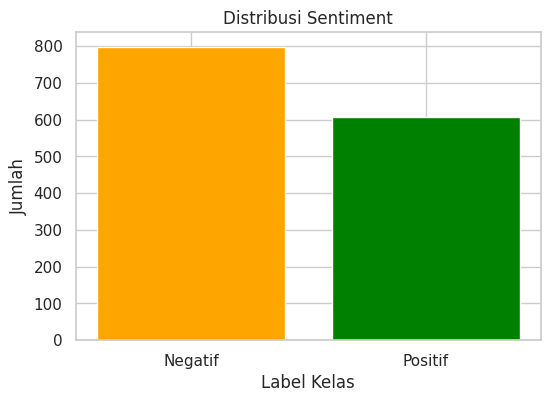

In [13]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing label
counts = df['polarity'].value_counts()

# Plot barplot
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=['orange', 'green'])
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentiment')
plt.show()

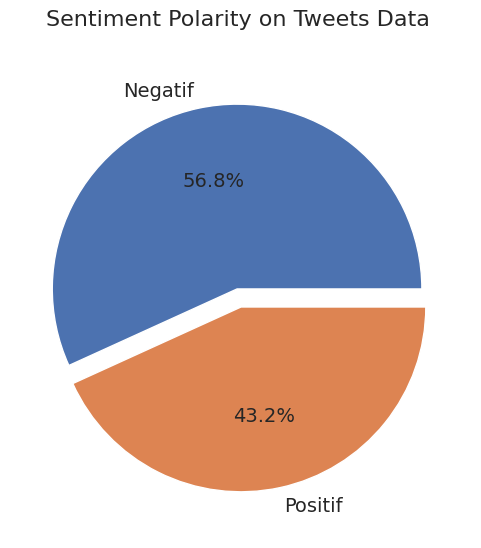

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
# Dynamically create the explode tuple based on the number of labels
# Set the first slice to be slightly exploded and the rest not.
explode = (0.1,) + (0,) * (len(labels) - 1)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n', fontsize = 16, pad = 20)
plt.show()

In [ ]:
df['text_preprocessed'] = df['case_folding']

In [ ]:
import ast

def strlist_to_custom_str(s):
    # ubah string ke list asli
    lst = ast.literal_eval(s)
    # gabungkan elemen list tanpa petik
    return '[' + ', '.join(lst) + ']'

df['text_preprocessed'] = df['stemming'].apply(strlist_to_custom_str)

In [ ]:
df['text_preprocessed'][0]

'[program, mbg, presiden, prabowo, masyarakat, bombana, optimis, sehat, anakanaknya]'

In [ ]:
def list_to_clean_text(x):
    if isinstance(x, list):
        return ' '.join(x)  # gabungkan elemen list dengan spasi
    elif isinstance(x, str):
        # Kalau string, bisa bersihkan tanda kurung dan koma dulu
        return x.replace('[', '').replace(']', '').replace(',', '')
    else:
        return ''

In [ ]:
df['text_preprocessed'] = df['text_preprocessed'].apply(list_to_clean_text)

In [ ]:
df['text_preprocessed']

,text_preprocessed
0,program mbg presiden prabowo masyarakat bomban...
1,diri csis ekonomi stabil program mbg potensi d...
2,reassurance asih gizi anak program mbg anak ra...
3,tangerang selatan peduli makan sehat garagara ...
4,keren program mbg presiden prabowo solusi bang...
...,...
1400,anggota komisi dpr badan gizi nasional bangun ...
1401,program makan gizi gratis mbg papua inisiatif ...
1402,salah program perintah salah vendor bela mati ...
1403,program mbg anak anak anak pintar tingkat pres...


## Download data siap tf & idf

In [ ]:
from google.colab import files

# Menyimpan DataFrame sebagai file CSV
df.to_csv('data_test.csv', index=False)

# Mengunduh file CSV
files.download('data_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

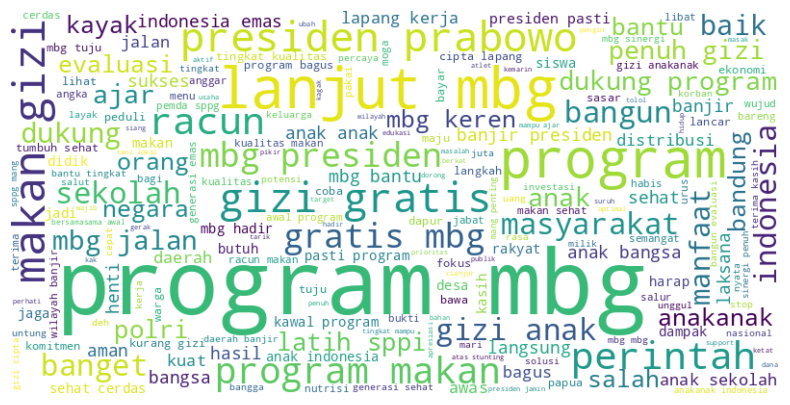

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['text_preprocessed'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Handling unbalancing

In [ ]:
# Memisahkan fitur dan target
X = df.drop('polarity', axis=1)  # Fitur
y = df['polarity']  # Target

In [ ]:
# Membuat objek SMOTE
smote = SMOTE(random_state=42)

# Menyeimbangkan data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan jumlah kategori setelah SMOTE
print("Jumlah kategori setelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Jumlah kategori setelah SMOTE:
0    561
1    561
Name: count, dtype: int64


## Sequence Normalization


In [ ]:
texts = df['text_preprocessed']

In [ ]:
texts[0]

'dengan adanya program mbg dari presiden prabowo masyarakat bombana semakin optimis sama kesehatan anakanaknya'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

MAX_SEQUENCE_LENGTH = 300
X_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [ ]:
X_padded

array([[  28,  153,    3, ...,    0,    0,    0],
       [1824, 1825,   92, ...,    0,    0,    0],
       [1826,   27,  683, ...,    0,    0,    0],
       ...,
       [ 385,   11,  159, ...,    0,    0,    0],
       [   3,    2,  573, ...,    0,    0,    0],
       [   3,    2,   71, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_padded

array([[   3,    2,    6, ...,    0,    0,    0],
       [ 803, 1138,   47, ...,    0,    0,    0],
       [1139,  369,    4, ...,    0,    0,    0],
       ...,
       [  49,    3,   13, ...,    0,    0,    0],
       [   3,    2,    8, ...,    0,    0,    0],
       [   3,    2, 2507, ...,    0,    0,    0]], dtype=int32)

## Modeling BI-GRU

In [ ]:
# Encode target data into numerical values
polarity_encode = {'Positif' : 1, 'Negatif' : 0}
polarity_encode
y = df['polarity'].map(polarity_encode).values

## Kode Lama

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.3, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout

VOCAB_SIZE = 10000  # sama dengan num_words tokenizer
EMBEDDING_DIM = 100

model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(GRU(32, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # asumsi binary classification
])

In [ ]:
model.compile(
    loss='binary_crossentropy',    # asumsi binary
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 300, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,083,525 (11.76 MB)

 Trainable params: 1,027,841 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,055,684 (7.84 MB)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=8,
    batch_size=32,
    shuffle=True
)

Epoch 1/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 403ms/step - accuracy: 0.5878 - loss: 0.6821 - val_accuracy: 0.4929 - val_loss: 0.7087
Epoch 2/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.5863 - loss: 0.6696 - val_accuracy: 0.4976 - val_loss: 0.6734
Epoch 3/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.7144 - loss: 0.5247 - val_accuracy: 0.7000 - val_loss: 0.5632
Epoch 4/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 394ms/step - accuracy: 0.8433 - loss: 0.3694 - val_accuracy: 0.7500 - val_loss: 0.5630
Epoch 5/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 401ms/step - accuracy: 0.9511 - loss: 0.1756 - val_accuracy: 0.7500 - val_loss: 0.6028
Epoch 6/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.9642 - loss: 0.1136 - val_accuracy: 0.7619 - val_loss: 0.7065
Epoch 7/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 358ms/step - accuracy: 0.9833 - loss: 0.0618 - val_accuracy: 0.7452 - val_loss: 0.8263
Epoch 8/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.9918 - loss: 0.0308 - val_accuracy: 0.

In [ ]:
chistory = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=8,
    batch_size=32,
    shuffle=True
)

Epoch 1/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 554ms/step - accuracy: 0.6039 - loss: 0.6793 - val_accuracy: 0.4952 - val_loss: 0.7092
Epoch 2/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.5835 - loss: 0.6739 - val_accuracy: 0.4952 - val_loss: 0.6972
Epoch 3/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.6629 - loss: 0.5888 - val_accuracy: 0.7310 - val_loss: 0.5804
Epoch 4/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 400ms/step - accuracy: 0.9066 - loss: 0.2755 - val_accuracy: 0.7643 - val_loss: 0.5482
Epoch 5/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 339ms/step - accuracy: 0.9533 - loss: 0.1367 - val_accuracy: 0.8000 - val_loss: 0.6466
Epoch 6/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 420ms/step - accuracy: 0.9826 - loss: 0.0535 - val_accuracy: 0.7881 - val_loss: 0.6602
Epoch 7/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.9948 - loss: 0.0266 - val_accuracy: 0.8143 - val_loss: 0.7429
Epoch 8/8
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


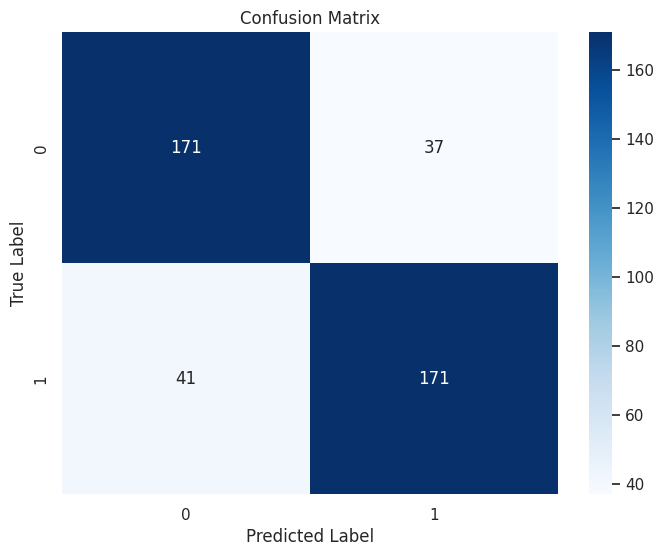

Accuracy: 0.8142857142857143
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       208
           1       0.82      0.81      0.81       212

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya setelah training:
# Prediksi terhadap data test
y_pred = model.predict(X_test)
# For binary classification with sigmoid output, y_pred contains probabilities
# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.4).astype(int).flatten() # Apply threshold and flatten to 1D array
# y_true is already in the correct format (0 or 1)
y_true = y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: akurasi dan laporan klasifikasi
print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

In [ ]:
import numpy as np
import pandas as pd

# Lakukan prediksi pada data test
y_pred = model.predict(X_test)

# Tentukan threshold jika model menghasilkan probabilitas
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Temukan data yang salah prediksi
incorrect_predictions = np.where(y_pred_binary.flatten() != y_test)[0] # Flatten y_pred_binary before comparison

# Ambil data yang salah prediksi dari X_test
incorrect_data = X_test[incorrect_predictions]
incorrect_labels = y_test[incorrect_predictions]
# Flatten the predicted values before putting them in the DataFrame
incorrect_predictions_values = y_pred_binary[incorrect_predictions].flatten()

# Gabungkan dengan df['text_preprocessed']
df_incorrect = pd.DataFrame({
    'Text': df['text_preprocessed'].iloc[incorrect_predictions].values,
    'True Label': incorrect_labels,
    'Predicted Label': incorrect_predictions_values # Use the flattened array here
})

# Tampilkan hasil
df_incorrect

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step


,Text,True Label,Predicted Label
0,reassurance buat ngasih gizi yang baik buat an...,1,0
1,program mbg keren banget terima kasih presiden...,1,0
2,kalau program mbg mau melibatkan kantin sekola...,0,1
3,program nya juga baru aja di laksanakan ka jik...,0,1
4,harus dong mbg kan emang program yang baik dan...,1,0
...,...,...,...
78,program mbg makin impactful berkat dukungan to...,0,1
79,banyak yg di dapat ank indonesia melalui progr...,1,0
80,program mbg dorong pertumbuhan ekonomi dengan ...,1,0
81,polri bawa warna baru di program mbg lewat pel...,1,0


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step


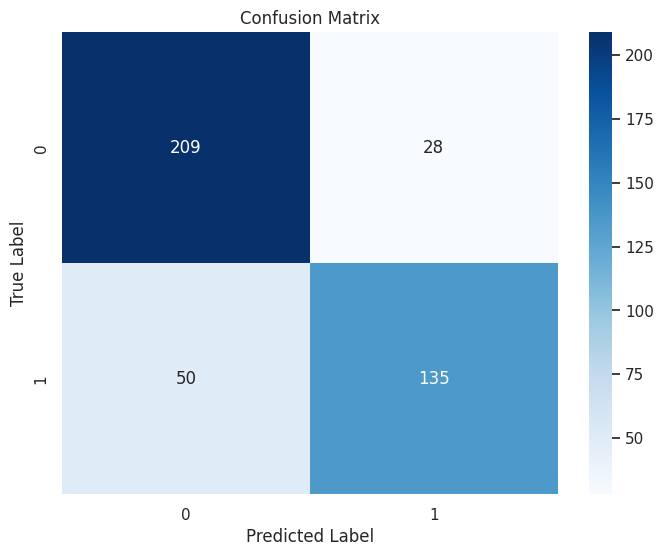

Accuracy: 0.8151658767772512
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       237
           1       0.83      0.73      0.78       185

    accuracy                           0.82       422
   macro avg       0.82      0.81      0.81       422
weighted avg       0.82      0.82      0.81       422



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya setelah training:
# Prediksi terhadap data test
y_pred = model.predict(X_test)
# For binary classification with sigmoid output, y_pred contains probabilities
# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.4).astype(int).flatten() # Apply threshold and flatten to 1D array
# y_true is already in the correct format (0 or 1)
y_true = y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: akurasi dan laporan klasifikasi
print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

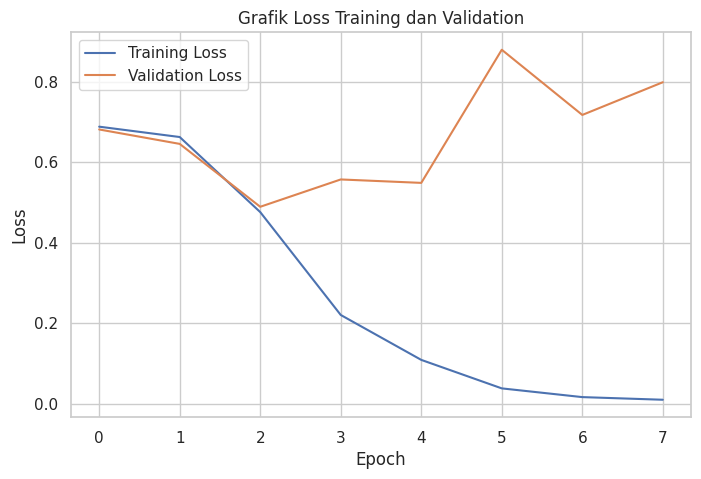

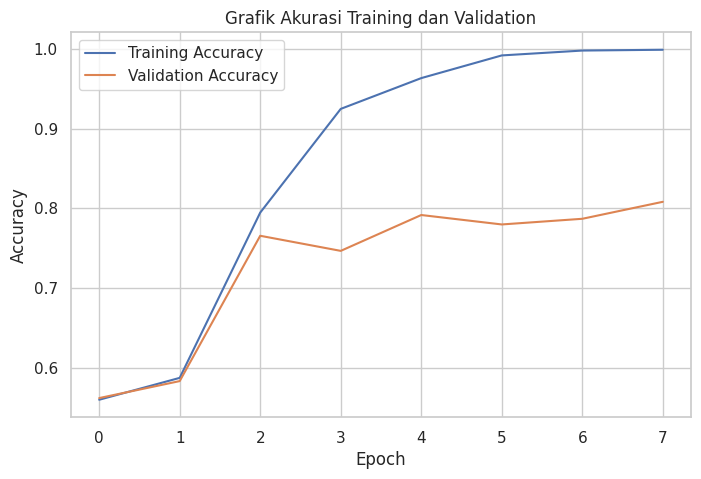

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step


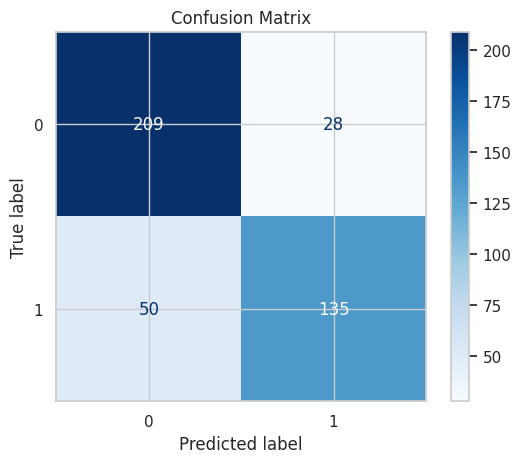

Classification Report:
              precision    recall  f1-score   support

     Kelas 0       0.81      0.88      0.84       237
     Kelas 1       0.83      0.73      0.78       185

    accuracy                           0.82       422
   macro avg       0.82      0.81      0.81       422
weighted avg       0.82      0.82      0.81       422

Evaluation Metrics:
Precision (macro): 0.82
Recall (macro): 0.81
F1 Score (macro): 0.81
Precision (micro): 0.82
Recall (micro): 0.82
F1 Score (micro): 0.82
Precision (weighted): 0.82
Recall (weighted): 0.82
F1 Score (weighted): 0.81
Bi-GRU Accuracy: 81.52%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Plot loss training dan validation
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot akurasi training dan validation
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Akurasi Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediksi terhadap data test
y_pred = model.predict(X_test)
# For binary classification with sigmoid output, y_pred contains probabilities
# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.4).astype(int).flatten() # Apply threshold and flatten to 1D array
# y_true is already in the correct format (0 or 1)
y_true = y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Kelas 0', 'Kelas 1'])
print("Classification Report:")
print(report)

# Precision, Recall, F1 Score
print("Evaluation Metrics:")
print(f"Precision (macro): {precision_score(y_test, y_pred_classes, average='macro'):.2f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_classes, average='macro'):.2f}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred_classes, average='macro'):.2f}")

print(f"Precision (micro): {precision_score(y_test, y_pred_classes, average='micro'):.2f}")
print(f"Recall (micro): {recall_score(y_test, y_pred_classes, average='micro'):.2f}")
print(f"F1 Score (micro): {f1_score(y_test, y_pred_classes, average='micro'):.2f}")

print(f"Precision (weighted): {precision_score(y_test, y_pred_classes, average='weighted'):.2f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_classes, average='weighted'):.2f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_classes, average='weighted'):.2f}")

# Evaluasi akhir
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Bi-GRU Accuracy: {accuracy * 100:.2f}%")

In [ ]:
import pandas as pd

# Melakukan prediksi pada data test (misalnya hasil probabilitas)
y_pred = model.predict(X_test)

# Tentukan threshold untuk mengubah probabilitas menjadi biner
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)  # Mengubah ke 0 atau 1

# Mengubah hasil prediksi dan label asli menjadi DataFrame
df_results = pd.DataFrame({
    'Actual': y_test.flatten(),  # Label asli
    'Predicted': y_pred_binary.flatten()  # Hasil prediksi dalam format 0 atau 1
})

# Gabungkan df_results dengan df['text_preprocessed']
df_combined = df_results.join(df['text_preprocessed'], how='left')

# Tampilkan DataFrame hasil gabungan
print(df_combined)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
     Actual  Predicted                                  text_preprocessed
0         1          1  dengan adanya program mbg dari presiden prabow...
1         1          1  pendiri csis ekonomi stabil program mbg berpot...
2         1          1  reassurance buat ngasih gizi yang baik buat an...
3         0          1  tangerang selatan makin peduli sama makanan se...
4         1          1  keren program mbg dari presiden prabowo solusi...
..      ...        ...                                                ...
417       0          0  banyak yg di dapat ank indonesia melalui progr...
418       0          0  anak gw minggu kemaren abis makan mbg langsung...
419       0          0  program mbg dorong pertumbuhan ekonomi dengan ...
420       1          1  program mbg bukan hanya cegah stunting tapi ju...
421       1          1  luar biasa untuk mendukung pertumbuhan dan per...

[422 rows x 3 columns]


In [ ]:
import numpy as np
import pandas as pd

# Lakukan prediksi pada data test
y_pred = model.predict(X_test)

# Tentukan threshold jika model menghasilkan probabilitas
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Temukan data yang salah prediksi
incorrect_predictions = np.where(y_pred_binary.flatten() != y_test)[0] # Flatten y_pred_binary before comparison

# Ambil data yang salah prediksi dari X_test
incorrect_data = X_test[incorrect_predictions]
incorrect_labels = y_test[incorrect_predictions]
# Flatten the predicted values before putting them in the DataFrame
incorrect_predictions_values = y_pred_binary[incorrect_predictions].flatten()

# Gabungkan dengan df['text_preprocessed']
df_incorrect = pd.DataFrame({
    'Text': df['text_preprocessed'].iloc[incorrect_predictions].values,
    'True Label': incorrect_labels,
    'Predicted Label': incorrect_predictions_values # Use the flattened array here
})

# Tampilkan hasil
df_incorrect

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


,Text,True Label,Predicted Label
0,program mbg keren banget terima kasih presiden...,0,1
1,melihat program mbg presiden prabowo sukses at...,1,0
2,makin cinta sama program mbg pelatihan dari po...,0,1
3,program makan bergizi gratis mbg yang digagas ...,1,0
4,pamekasan optimis program mbg presiden prabowo...,0,1
...,...,...,...
76,pelatihan sppi dari polri bawa angin segar ke ...,1,0
77,program mbg kalau mau lanjut perlu rekrut test...,1,0
78,program mbg merupakan langkah strategis menuju...,0,1
79,bangga sih lihat polri ikut support program mb...,1,0


In [ ]:
# Menyimpan DataFrame ke dalam file CSV
df_incorrect.to_csv('prediksi_revisi.csv', index=False)

from google.colab import files

# Menyimpan DataFrame ke dalam file CSV
df_incorrect.to_csv('prediksi_revisi.csv', index=False)

# Mengunduh file
files.download('prediksi_revisi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TF & IDF

In [ ]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function
#def toSentence(text):
    #return ' '.join(text)
# Select multiple columns using a list
X = df['text_preprocessed']

In [ ]:
# TF-IDF Vectorizer
tf_idf = TfidfVectorizer(ngram_range=(1, 1), max_features=500000)
response = tf_idf.fit_transform(X)
print(response)

# Melihat matriks jumlah token (siap untuk machine learning)
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

  (0, 1774)	0.07770375207865832
  (0, 1341)	0.07836979306914676
  (0, 1756)	0.19591679253505792
  (0, 1744)	0.2419828778555079
  (0, 1334)	0.3137726710307362
  (0, 324)	0.45396803771477706
  (0, 1583)	0.45396803771477706
  (0, 1982)	0.2692006845111837
  (0, 86)	0.5547836907430463
  (1, 1774)	0.06279156514203472
  (1, 1341)	0.06332978569281565
  (1, 523)	0.4302763949100375
  (1, 436)	0.47373832372640867
  (1, 585)	0.2744670098943344
  (1, 2117)	0.4483147251598193
  (1, 1741)	0.3473992515830923
  (1, 559)	0.3359672689604875
  (1, 2355)	0.26944814729091654
  (2, 1774)	0.05266293228885742
  (2, 1341)	0.05311433483565066
  (2, 1850)	0.39732166587354856
  (2, 137)	0.33144127442218135
  (2, 713)	0.12541587191855924
  (2, 84)	0.29836979793230123
  (2, 1819)	0.3588843821698188
  :	:
  (1402, 1337)	0.26666809148825654
  (1402, 2415)	0.2547866196427131
  (1402, 94)	0.29529555735866175
  (1402, 433)	0.3120415513835236
  (1402, 2407)	0.3120415513835236
  (1403, 1774)	0.06720506368998244
  (1403, 13

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Split data

In [ ]:
# from sklearn.model_selection import train_test_split

# Split data (X_tf_idf dan y) menjadi train dan test
# X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.2, random_state=42)

## Seleksi Fitur Chi Square

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
# Encode target data into numerical values
polarity_encode = {'Positif' : 1, 'Negatif' : 0}
polarity_encode

{'Positif': 1, 'Negatif': 0}

In [ ]:
y = df['polarity'].map(polarity_encode).values

In [ ]:
# Tentukan nilai taraf nyata (α)
alpha = 0.6
# Hitung nilai chi-square dan p-value untuk setiap fitur
chi2_values, p_values = chi2(X_tf_idf, y)

# Pilih fitur dengan p-value <= alpha
selected_feature_indices = np.where(p_values <= alpha)[0]

# Membuat dataframe fitur terpilih dengan p-value <= 0.5
feature_names = tf_idf.get_feature_names_out()
selected_df = pd.DataFrame({
    'Fitur': feature_names[selected_feature_indices],
    'Chi-Square': chi2_values[selected_feature_indices],
    'P-Value': p_values[selected_feature_indices]
})

# Urutkan berdasarkan p-value
selected_df = selected_df.sort_values(by='P-Value')
selected_df

,Fitur,Chi-Square,P-Value
307,dukung,12.413672,0.000426
657,kualitas,11.123938,0.000852
402,gratis,10.853730,0.000986
732,mampu,8.223826,0.004134
627,konsentrasi,8.151465,0.004303
...,...,...,...
148,berhentiin,0.276098,0.599270
202,cacat,0.276098,0.599270
766,mengkibatkan,0.276056,0.599298
1070,rumit,0.275577,0.599615


In [ ]:
# Filter X_tf_idf berdasarkan fitur terpilih
X_selected = X_tf_idf[:, selected_feature_indices]

In [ ]:
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

In [ ]:
feature_names = tf_idf.get_feature_names_out()
selected_features = feature_names[selected_feature_indices]

print("Jumlah fitur terpilih:", len(selected_features))
print("Contoh fitur:", selected_features[:10])

Jumlah fitur terpilih: 751
Contoh fitur: ['aceh' 'aco' 'acung' 'adisutjipto' 'aduh' 'agung' 'aja' 'ajaib' 'ajar'
 'akademi']


## kode baru

In [ ]:
selected_vocab = [feature_names[i] for i in selected_feature_indices]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Buat tokenizer khusus dari vocab terpilih
tokenizer = Tokenizer(num_words=len(selected_vocab))
tokenizer.fit_on_texts(selected_vocab)  # Melatih tokenizer hanya dari fitur terpilih

# Tokenisasi ulang teks asli
sequences = tokenizer.texts_to_sequences(X)

# Padding agar panjang sequence sama
maxlen = 100  # atur sesuai datasetmu
X_seq = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

vocab_size = len(selected_vocab) + 1  # +1 untuk padding token
embedding_dim = 100  # bisa disesuaikan

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(GRU(units=64, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))  # binary classification, sesuaikan output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_36 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_seq, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.5276 - loss: 0.6855 - val_accuracy: 0.6619 - val_loss: 0.6350
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6990 - loss: 0.6040 - val_accuracy: 0.7117 - val_loss: 0.5869
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7929 - loss: 0.4861 - val_accuracy: 0.7367 - val_loss: 0.5211
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8489 - loss: 0.3697 - val_accuracy: 0.7295 - val_loss: 0.5215
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8863 - loss: 0.2705 - val_accuracy: 0.7509 - val_loss: 0.5579
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9173 - loss: 0.2087 - val_accuracy: 0.7402 - val_loss: 0.5929
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9287 - loss: 0.1666 - val_accuracy: 0.7367 - val_loss: 0.6522
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9388 - loss: 0.1395 - val_accuracy: 0.7402

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.1, random_state=42
)

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Prediksi di data test
y_pred = model.predict(X_test)

# Evaluasi akurasi
acc = accuracy_score(y_test, y_pred)
print(f'Akurasi: {acc:.2f}')

Akurasi: 0.77


## SVM

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.569 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.573 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.573 total time=   0.4s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.573 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.571 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.569 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

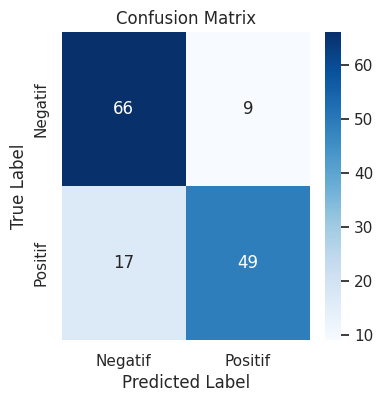

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        75
           1       0.84      0.74      0.79        66

    accuracy                           0.82       141
   macro avg       0.82      0.81      0.81       141
weighted avg       0.82      0.82      0.81       141



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid
parameters = [
    {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100, 1000]}
]

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi objek GridSearchCV dengan penambahan parameter scoring='accuracy'
grid_search = GridSearchCV(svm_model, parameters, scoring='accuracy', verbose=3)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

# Hitung jumlah data yang berhasil diprediksi model & jumlah data yang salah diprediksi
model_pred = grid_search.predict(X_test)
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian\t:', accuracy, '%')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, model_pred)

# Membuat label untuk sumbu x dan y
labels = ["Negatif", "Positif"]

# Visualisasi confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

## BI-GRU

In [ ]:
# Setelah compile
model_bi_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Tampilkan model summary
model_bi_gru.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_20 (Bidirectional)     │ (None, 128)                 │         571,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 571,266 (2.18 MB)

 Trainable params: 571,266 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Pastikan X_train dan X_test numpy array (dense)
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Ubah ke 3D (samples, timesteps=1, features)
X_train_3d = np.expand_dims(X_train_dense, axis=1)
X_test_3d = np.expand_dims(X_test_dense, axis=1)

# Definisi model
model_bi_gru = Sequential()
model_bi_gru.add(Bidirectional(GRU(32), input_shape=(2, X_train_dense.shape[1])))
model_bi_gru.add(Dropout(0.2))
model_bi_gru.add(Dense(2, activation='softmax'))

model_bi_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training
model_bi_gru.fit(X_train_3d, y_train, validation_data=(X_test_3d, y_test), epochs=14, batch_size=32)

# Evaluasi
y_pred = model_bi_gru.predict(X_test_3d)
y_pred_classes = y_pred.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Bi-GRU Accuracy: {accuracy * 100:.2f}%")

Epoch 1/14


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5789 - loss: 0.6849 - val_accuracy: 0.5745 - val_loss: 0.6611
Epoch 2/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6257 - loss: 0.6335 - val_accuracy: 0.6809 - val_loss: 0.6058
Epoch 3/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7633 - loss: 0.5615 - val_accuracy: 0.8014 - val_loss: 0.5274
Epoch 4/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8285 - loss: 0.4713 - val_accuracy: 0.8085 - val_loss: 0.4616
Epoch 5/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8613 - loss: 0.3922 - val_accuracy: 0.8298 - val_loss: 0.4202
Epoch 6/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8814 - loss: 0.3346 - val_accuracy: 0.8298 - val_loss: 0.3964
Epoch 7/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8921 - loss: 0.2933 - val_accuracy: 0.8440 - val_loss: 0.3819
Epoch 8/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9005 - loss: 0.2620 - val_accuracy: 0.8511 - val_loss: 0.3

In [ ]:
# Pastikan X_train dan X_test numpy array (dense)
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Ubah ke 3D (samples, timesteps=1, features)
X_train_3d = np.expand_dims(X_train_dense, axis=1)
X_test_3d = np.expand_dims(X_test_dense, axis=1)

# Definisi model
model_bi_gru = Sequential()
model_bi_gru.add(Bidirectional(GRU(32), input_shape=(1, X_train_dense.shape[1])))
model_bi_gru.add(Dropout(0.2))
model_bi_gru.add(Dense(3, activation='softmax'))

model_bi_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training
model_bi_gru.fit(X_train_3d, y_train, validation_data=(X_test_3d, y_test), epochs=14, batch_size=32)

# Evaluasi
y_pred = model_bi_gru.predict(X_test_3d)
y_pred_classes = y_pred.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Bi-GRU Accuracy: {accuracy * 100:.2f}%")

Epoch 1/14


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.5265 - loss: 1.0539 - val_accuracy: 0.6241 - val_loss: 0.9048
Epoch 2/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6699 - loss: 0.8524 - val_accuracy: 0.6099 - val_loss: 0.7359
Epoch 3/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6690 - loss: 0.6880 - val_accuracy: 0.6950 - val_loss: 0.6348
Epoch 4/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7673 - loss: 0.5935 - val_accuracy: 0.7943 - val_loss: 0.5601
Epoch 5/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8155 - loss: 0.5280 - val_accuracy: 0.8014 - val_loss: 0.5079
Epoch 6/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8034 - loss: 0.4691 - val_accuracy: 0.8298 - val_loss: 0.4627
Epoch 7/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8297 - loss: 0.4215 - val_accuracy: 0.8298 - val_loss: 0.4344
Epoch 8/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8610 - loss: 0.3619 - val_accuracy: 0.8369 - val_loss: 0.4109
E

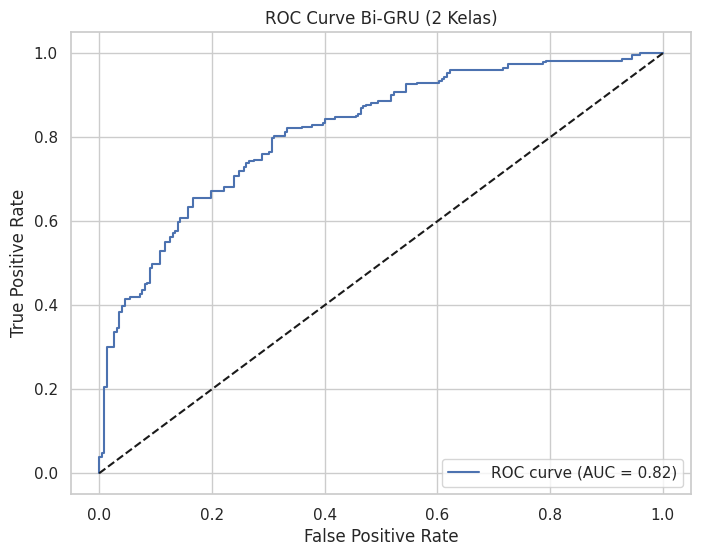

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize label (2 kelas: 0 dan 1)
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()  # jadikan 1D array

# Probabilitas prediksi kelas positif (kelas 1)
y_score = y_pred[:, 1]  # ambil probabilitas kelas 1

# Hitung ROC curve dan AUC
fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Bi-GRU (2 Kelas)')
plt.legend(loc='lower right')
plt.show()

Epoch 1/14


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5539 - loss: 1.0524 - val_accuracy: 0.6170 - val_loss: 0.8983
Epoch 2/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6498 - loss: 0.8451 - val_accuracy: 0.5957 - val_loss: 0.7350
Epoch 3/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6883 - loss: 0.6821 - val_accuracy: 0.7518 - val_loss: 0.6335
Epoch 4/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7869 - loss: 0.5915 - val_accuracy: 0.8085 - val_loss: 0.5617
Epoch 5/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8332 - loss: 0.4996 - val_accuracy: 0.8369 - val_loss: 0.5008
Epoch 6/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8756 - loss: 0.4277 - val_accuracy: 0.8298 - val_loss: 0.4569
Epoch 7/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8824 - loss: 0.3766 - val_accuracy: 0.8369 - val_loss: 0.4303
Epoch 8/14
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8843 - loss: 0.3354 - val_accuracy: 0.8369 - val_loss: 0.4

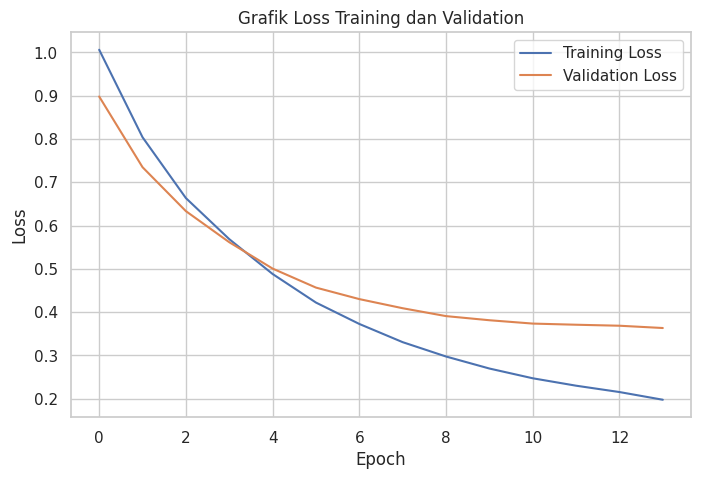

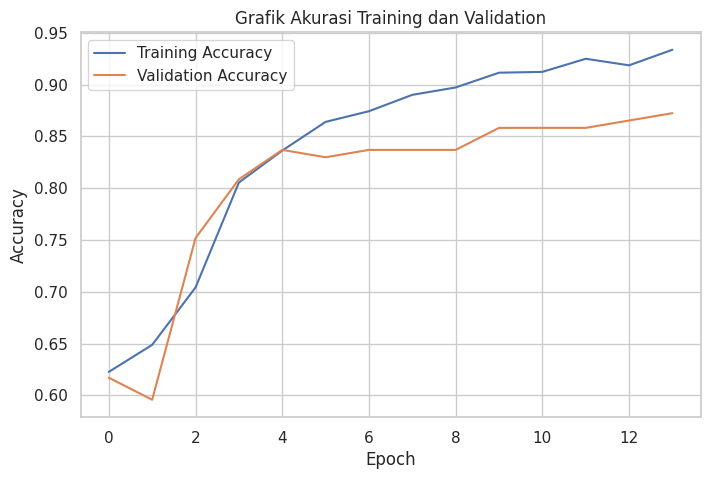

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


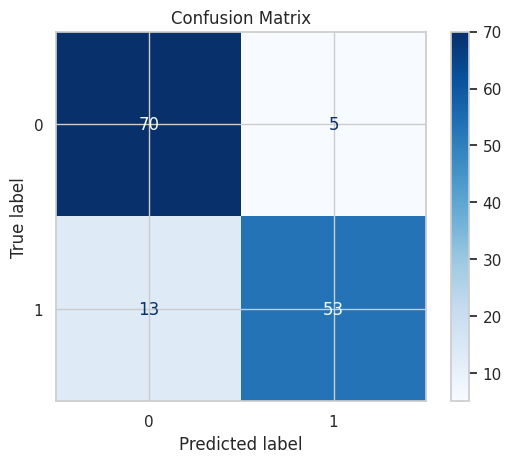

Classification Report:
              precision    recall  f1-score   support

     Kelas 0       0.84      0.93      0.89        75
     Kelas 1       0.91      0.80      0.85        66

    accuracy                           0.87       141
   macro avg       0.88      0.87      0.87       141
weighted avg       0.88      0.87      0.87       141

Evaluation Metrics:
Precision (macro): 0.88
Recall (macro): 0.87
F1 Score (macro): 0.87
Precision (micro): 0.87
Recall (micro): 0.87
F1 Score (micro): 0.87
Precision (weighted): 0.88
Recall (weighted): 0.87
F1 Score (weighted): 0.87
Bi-GRU Accuracy: 87.23%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Pastikan X_train dan X_test numpy array (dense)
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Ubah ke 3D (samples, timesteps=1, features)
X_train_3d = np.expand_dims(X_train_dense, axis=1)
X_test_3d = np.expand_dims(X_test_dense, axis=1)

# Definisi model
model_bi_gru = Sequential()
model_bi_gru.add(Bidirectional(GRU(32), input_shape=(1, X_train_dense.shape[1])))
model_bi_gru.add(Dropout(0.2))
model_bi_gru.add(Dense(3, activation='softmax'))

model_bi_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training dan simpan history
history = model_bi_gru.fit(
    X_train_3d, y_train,
    validation_data=(X_test_3d, y_test),
    epochs=14,
    batch_size=32
)

# Plot loss training dan validation
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot akurasi training dan validation
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Akurasi Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediksi
y_pred = model_bi_gru.predict(X_test_3d)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Kelas 0', 'Kelas 1'])
print("Classification Report:")
print(report)

# Precision, Recall, F1 Score
print("Evaluation Metrics:")
print(f"Precision (macro): {precision_score(y_test, y_pred_classes, average='macro'):.2f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_classes, average='macro'):.2f}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred_classes, average='macro'):.2f}")

print(f"Precision (micro): {precision_score(y_test, y_pred_classes, average='micro'):.2f}")
print(f"Recall (micro): {recall_score(y_test, y_pred_classes, average='micro'):.2f}")
print(f"F1 Score (micro): {f1_score(y_test, y_pred_classes, average='micro'):.2f}")

print(f"Precision (weighted): {precision_score(y_test, y_pred_classes, average='weighted'):.2f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_classes, average='weighted'):.2f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_classes, average='weighted'):.2f}")

# Evaluasi akhir
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Bi-GRU Accuracy: {accuracy * 100:.2f}%")